In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Objective

To explore data and stablish a binning analysis on the continouos variables from the TARA Chile expedition.

## Read metadata file

In [2]:
metadata = pd.read_csv('../01_data/00_metadata/metadata_chile.tsv', sep='\t', index_col=0)
metadata.head()

,SAMEA ID,Leg,Station,Station ID,Depth ID,lat_cast,lon_cast,datetime,Depth [m],Temperature [ºC],...,day,hour,minute,second,instrument,original file,Depth level,Oxygen level,Biogeographical units,Freshwater inputs
Samples,,,,,,,,,,,,,,,,,,,,,
S01_Z00,SAMEA7920473,1,1,MMC-001,Z0,-50.898333,-74.278333,2/20/2021 10:24,2,11.272,...,20,10,24,52,sbe17plusV2,cast 011000.cnv,SRF,OXIC,PFR,YES
S01_Z01,SAMEA7920507,1,1,MMC-001,Z1,-50.898333,-74.278333,2/20/2021 10:24,20,10.569,...,20,10,24,52,sbe17plusV2,cast 011000.cnv,EPI,OXIC,PFR,YES
S01_Z05,SAMEA7920503,1,1,MMC-001,Z5,-50.898333,-74.278333,2/20/2021 10:24,90,9.060,...,20,10,24,52,sbe17plusV2,cast 011000.cnv,EPI,OXIC,PFR,NO
S02_Z00,SAMEA7920664,1,2,MMC-002,Z0,-50.701667,-74.573333,2/22/2021 10:12,2,11.465,...,22,10,12,1,sbe17plusV2,cast 015000.cnv,SRF,OXIC,PFR,YES
S02_Z01,SAMEA7920687,1,2,MMC-002,Z1,-50.701667,-74.573333,2/22/2021 10:12,10,11.426,...,22,10,12,1,sbe17plusV2,cast 015000.cnv,EPI,OXIC,PFR,YES


## Explore useful environmental variables

In [3]:
print('Columns of the metadata table:\n', metadata.columns)

vars_to_drop = [
    'Station', 'Station ID', 'Depth ID', 'datetime', 'year', 'month', 
    'day', 'hour', 'minute', 'second', 'instrument', 'original file'
]

vars_cont = ['Depth [m]', 'Temperature [ºC]', 'Salinity [PSU]',
             'Density [kg/m3]','Oxygen [ml/l]', 'Oxygen [%]', 'Fluorescence [mg/m3]',
             'Orthophosphate [uM]', 'Silicic-acid [uM]', 'Nitrite [uM]','Nitrates [uM]',
             'Nitrate [uM]', 'NP ratio'
]

md = metadata.drop(columns=vars_to_drop)
md_cont = md[vars_cont]

Columns of the metadata table:
 Index(['SAMEA ID', 'Leg', 'Station', 'Station ID', 'Depth ID', 'lat_cast',
       'lon_cast', 'datetime', 'Depth [m]', 'Temperature [ºC]',
       'Salinity [PSU]', 'Density [kg/m3]', 'Oxygen [ml/l]', 'Oxygen [%]',
       'Fluorescence [mg/m3]', 'Orthophosphate [uM]', 'Silicic-acid [uM]',
       'Nitrite [uM]', 'Nitrates [uM]', 'Nitrate [uM]', 'NP ratio', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'instrument',
       'original file', 'Depth level', 'Oxygen level', 'Biogeographical units',
       'Freshwater inputs'],
      dtype='object')


These are the variables we will work with:

- Depth [m]
- Temperature [ºC]
- Salinity [PSU]
- Density [kg/m3]
- Oxygen [ml/l]
- Oxygen [%]
- Fluorescence [mg/m3]
- Orthophosphate [uM]
- Silicic-acid [uM]
- Nitrite [uM]
- Nitrates [uM]
- Nitrate [uM]
- NP ratio
- lon_cast (Longitude)
- lat_cast (Latitude)
- Depth level
- Oxygen level
- Biogeographical units
- Freshwater inputs

# EDA

In [4]:
# Folder to save results
out = '../03_results/out_eda'

In [5]:
print('NaN values exploration:\n', md[vars_cont].isna().sum())
print('\n')
print('Description of the data:\n', md[vars_cont].describe())

NaN values exploration:
 Depth [m]               0
Temperature [ºC]        0
Salinity [PSU]          0
Density [kg/m3]         0
Oxygen [ml/l]           0
Oxygen [%]              0
Fluorescence [mg/m3]    0
Orthophosphate [uM]     0
Silicic-acid [uM]       0
Nitrite [uM]            0
Nitrates [uM]           0
Nitrate [uM]            0
NP ratio                0
dtype: int64


Description of the data:
         Depth [m]  Temperature [ºC]  Salinity [PSU]  Density [kg/m3]  \
count  159.000000        159.000000      159.000000       159.000000   
mean   112.283019         11.741051       32.735075      1025.357250   
std    154.781722          3.134264        5.226391         4.388282   
min      1.000000          5.081000        1.770000      1001.039000   
25%     20.000000         10.057500       33.540000      1025.229500   
50%     50.000000         11.426000       34.280000      1026.122100   
75%    150.000000         13.375000       34.520000      1027.057000   
max    600.000000   

## Explore location of the data

In this section, we will explore the geospatial locations of sampling

In [6]:
import folium

m = folium.Map(location=[md['lat_cast'].mean(), md['lon_cast'].mean()], zoom_start=4)

for idx, row in md.iterrows():
    folium.Marker([row['lat_cast'], row['lon_cast']], tooltip=f'Index: {idx}').add_to(m)
m.save(f'{out}/map_tara_chile.html')
m

## Explore distirbutions

In this section, we will explore the distribution of the selected continuous environmental variables from the TARA Chile expedition dataset. We will use histograms and box plots to visualize the distributions

### Histograms

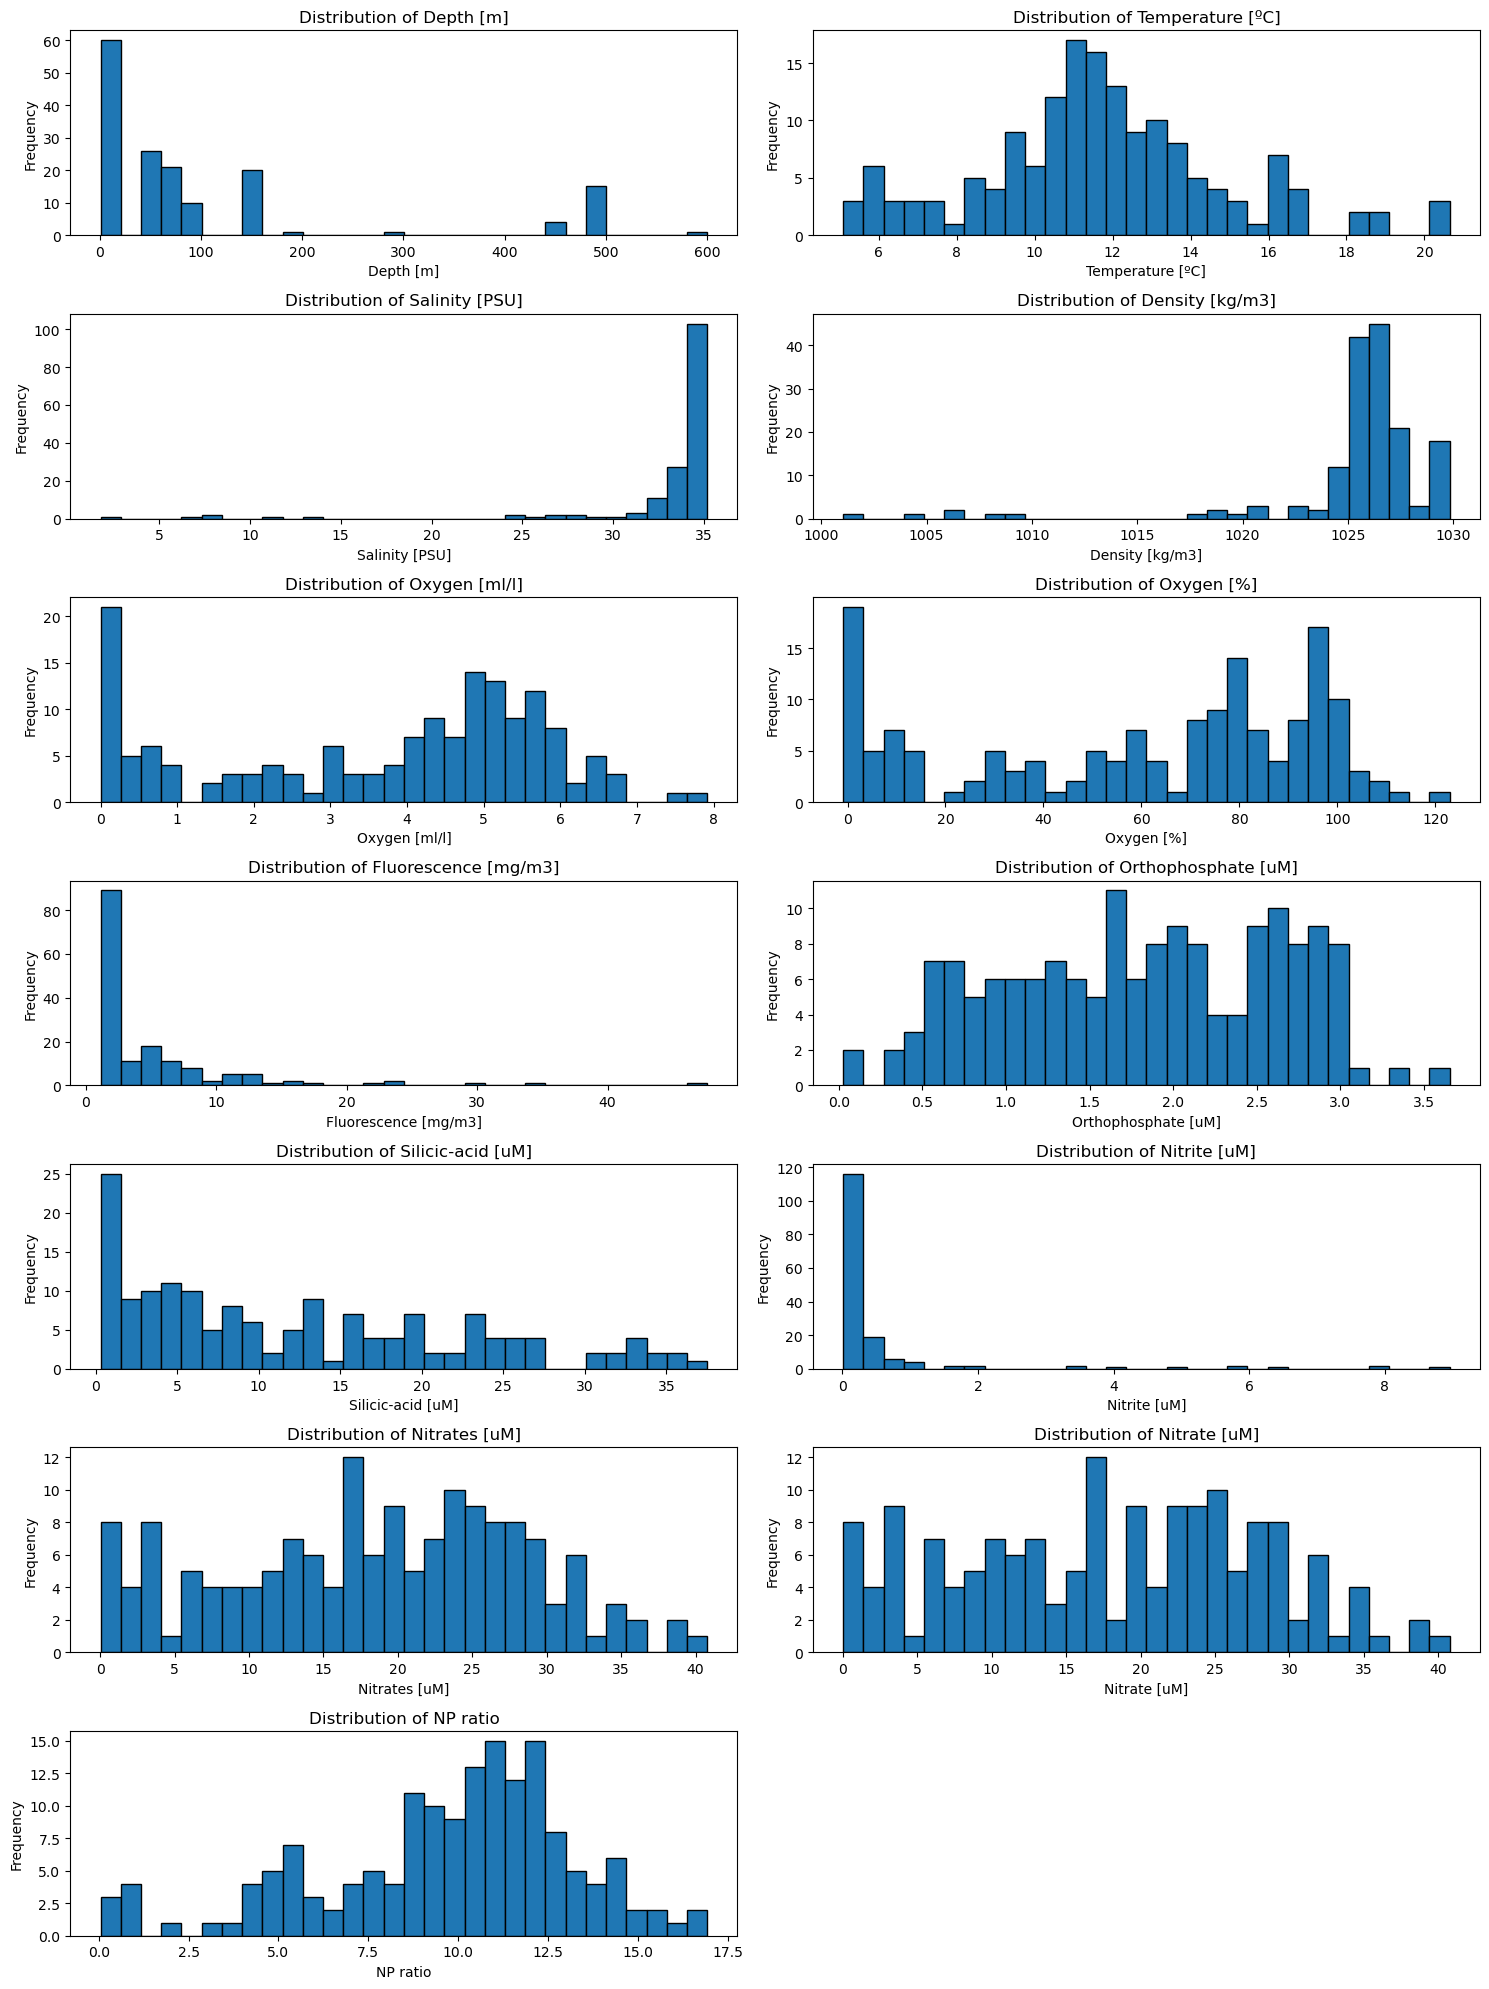

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each variable
plt.figure(figsize=(15, 20))
for i, var in enumerate(vars_cont):
    plt.subplot(7, 2, i + 1)
    plt.hist(md[var].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.savefig(f'{out}/histograms.pdf', bbox_inches='tight')
plt.show()

### Box plots

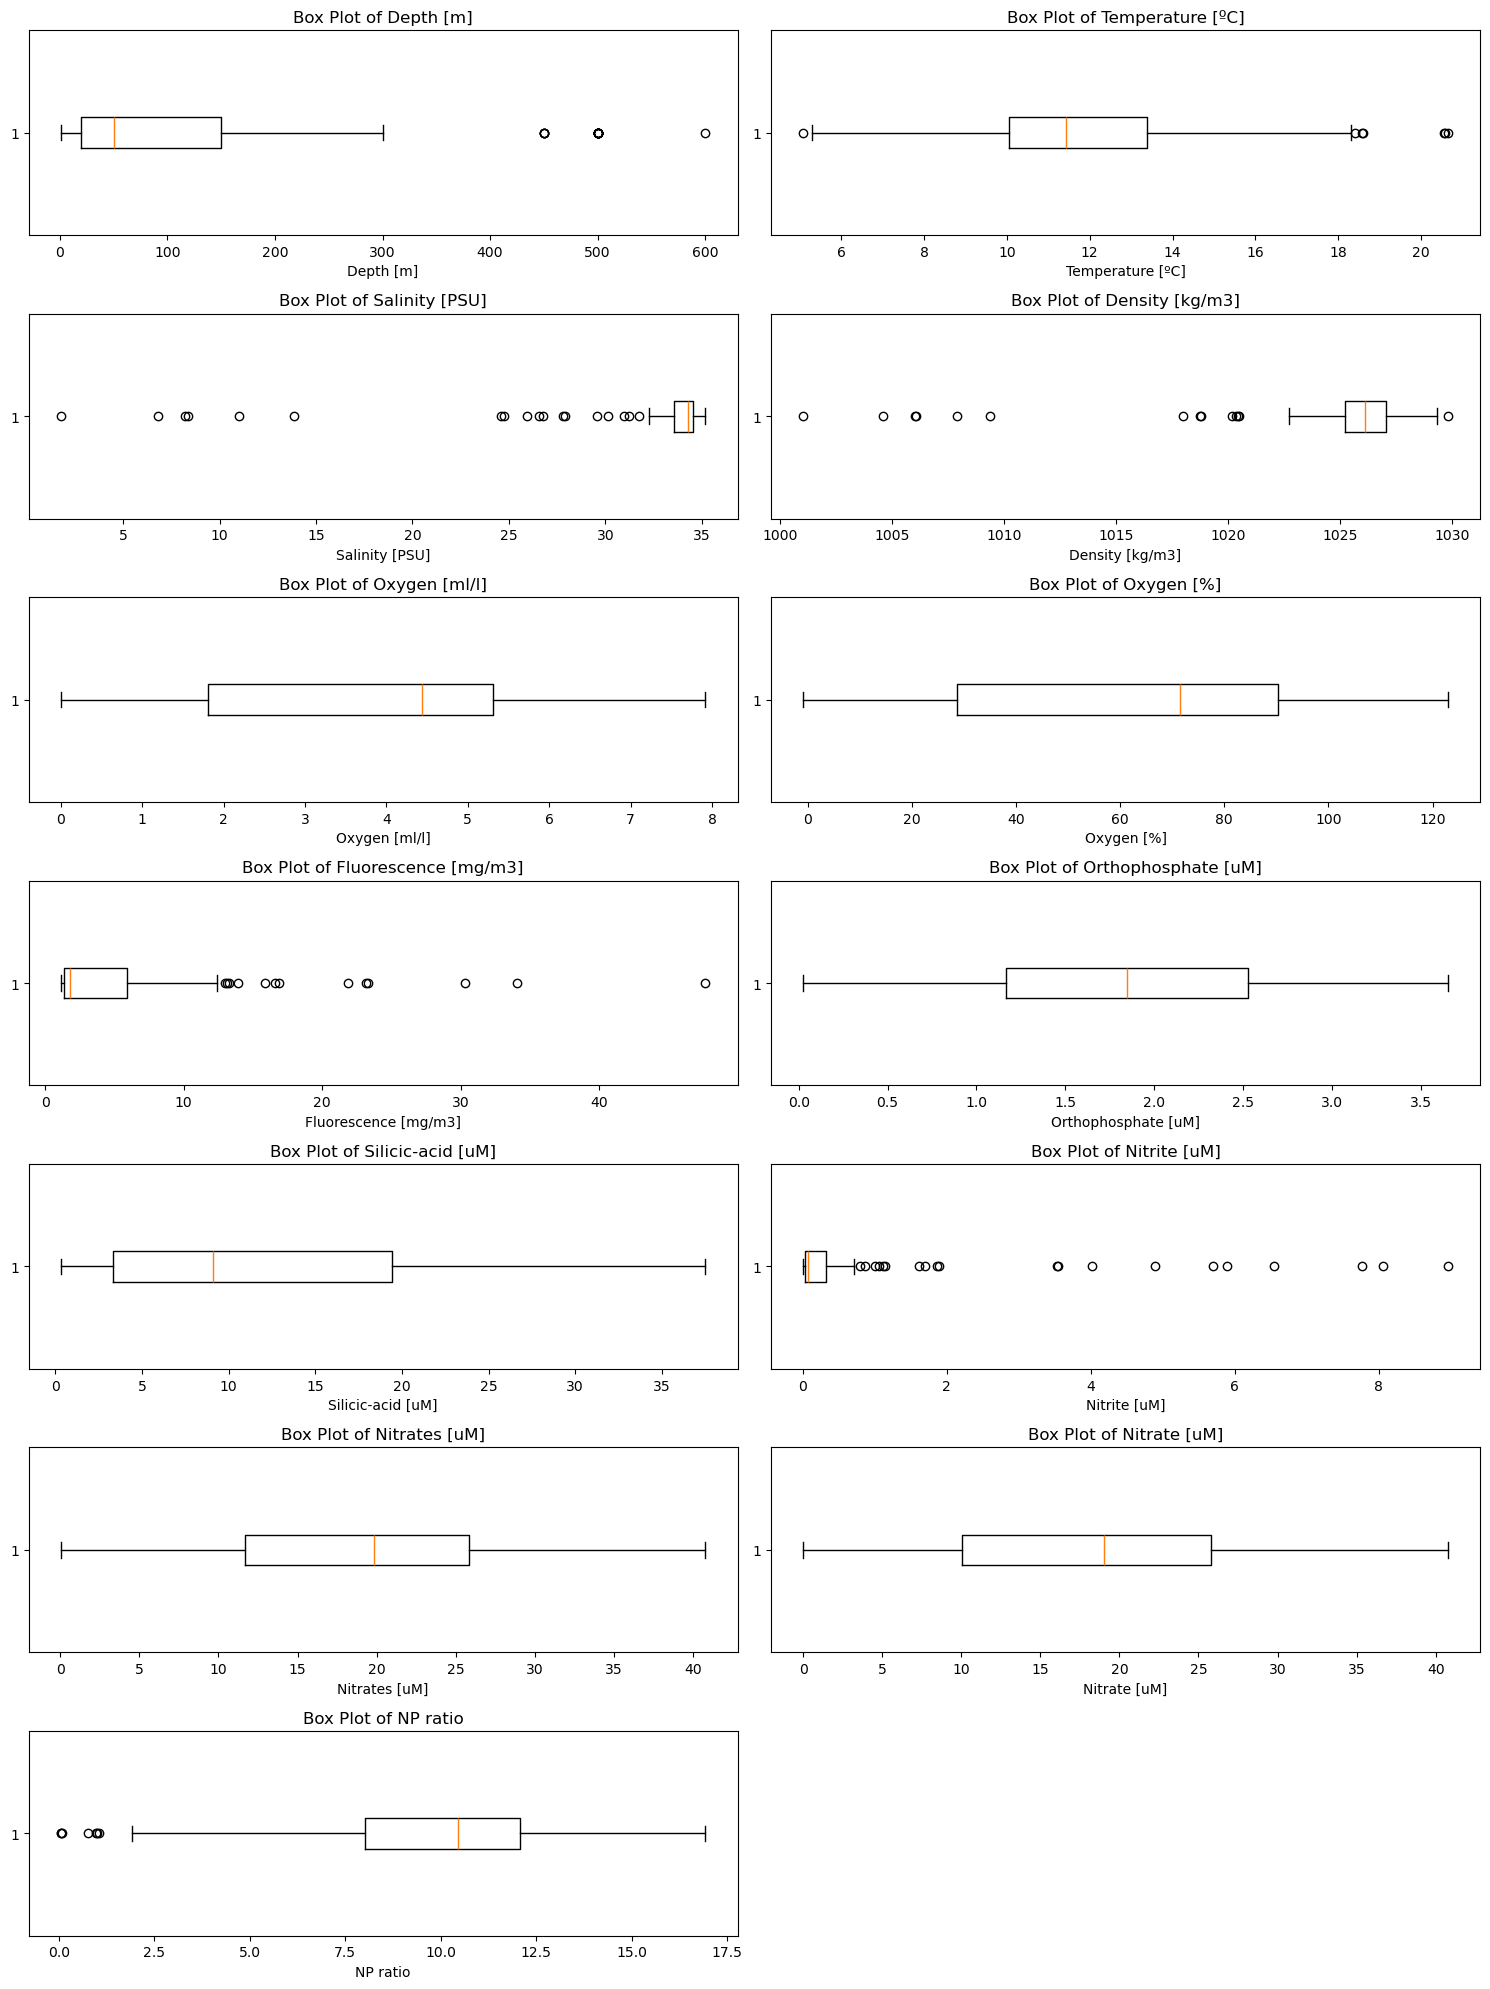

In [8]:
# Plot box plots for each variable
plt.figure(figsize=(15, 20))
for i, var in enumerate(vars_cont):
    plt.subplot(7, 2, i + 1)
    plt.boxplot(md[var].dropna(), vert=False)
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.savefig(f'{out}/boxplots.pdf', bbox_inches='tight')
plt.show()

### Pairplot

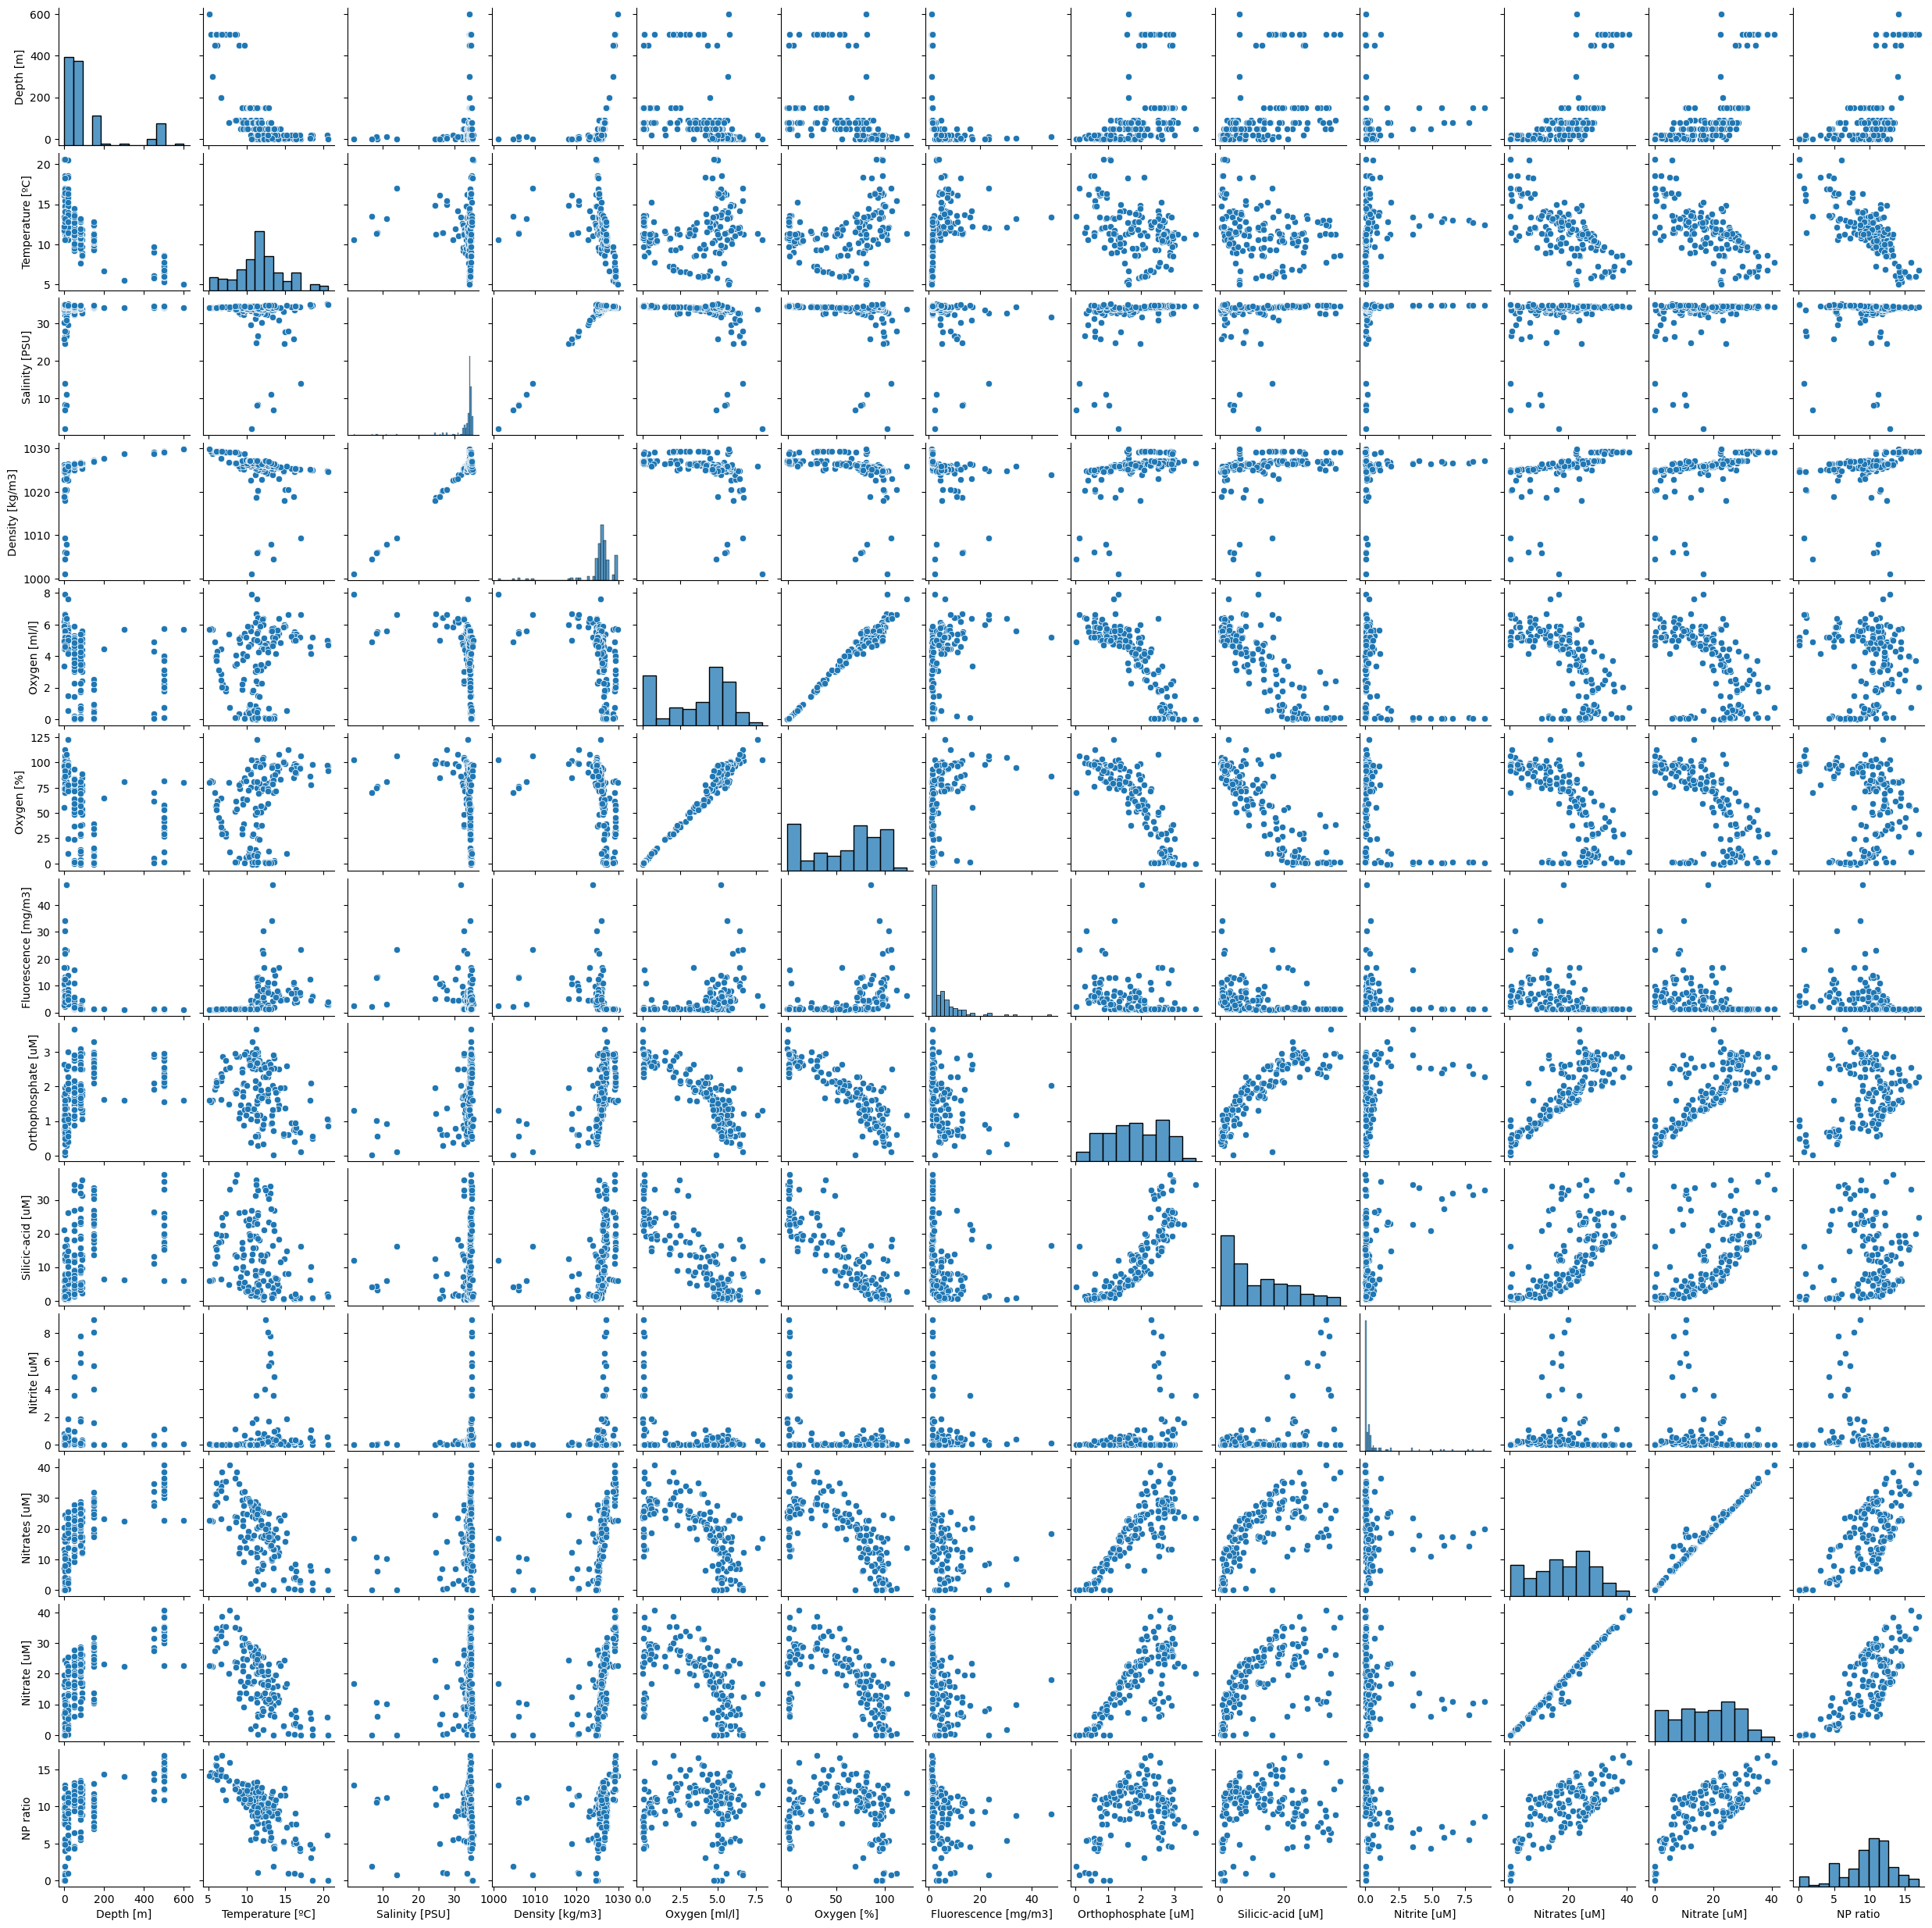

In [9]:
# Pair plot de variables continuas

pairplot_fig = sns.pairplot(md[vars_cont], height=2.5)
pairplot_fig.fig.set_size_inches(25, 25)
plt.savefig(f'{out}/pairplot.pdf', bbox_inches='tight')
plt.show()

# Binning analysis

## Temperature [ºC]

NaN values for Temperature [ºC] 0


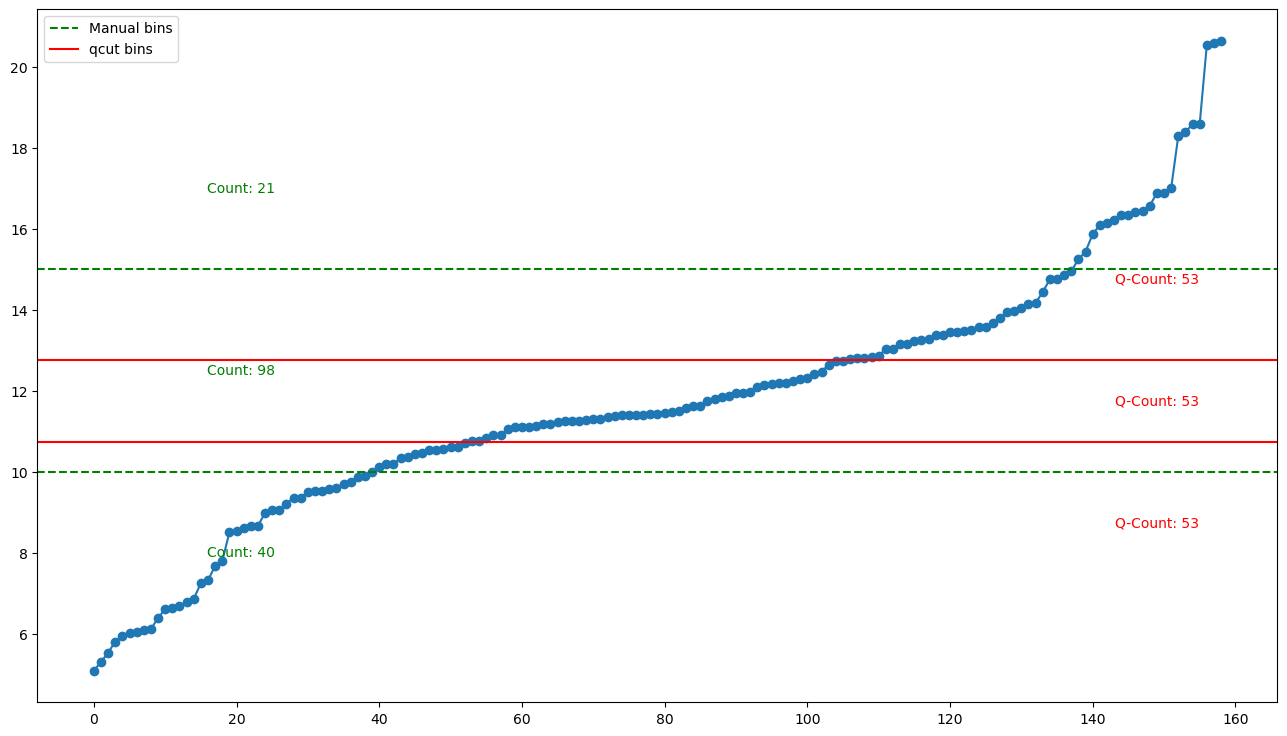

In [10]:
var = 'Temperature [ºC]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_temp = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_temp, '-o')

a = 10 # First bin
b = 15 # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_temp < a)
bin2_count = np.sum((sorted_temp >= a) & (sorted_temp < b))
bin3_count = np.sum(sorted_temp >= b)

# Text for manual bins
plt.text(len(sorted_temp) * 0.1, a-2, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_temp) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_temp) * 0.1, b+2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_temp, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')
# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_temp < bin_edges[1])
qbin2_count = np.sum((sorted_temp >= bin_edges[1]) & (sorted_temp < bin_edges[2]))
qbin3_count = np.sum(sorted_temp >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_temp) * 0.9, bin_edges[1]-2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_temp) * 0.9, (bin_edges[1]+bin_edges[2])/2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_temp) * 0.9, bin_edges[2]+2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_temperature.pdf', bbox_inches='tight')
plt.show()

## Salinity [PSU] 3 bins

NaN values for Salinity [PSU] 0


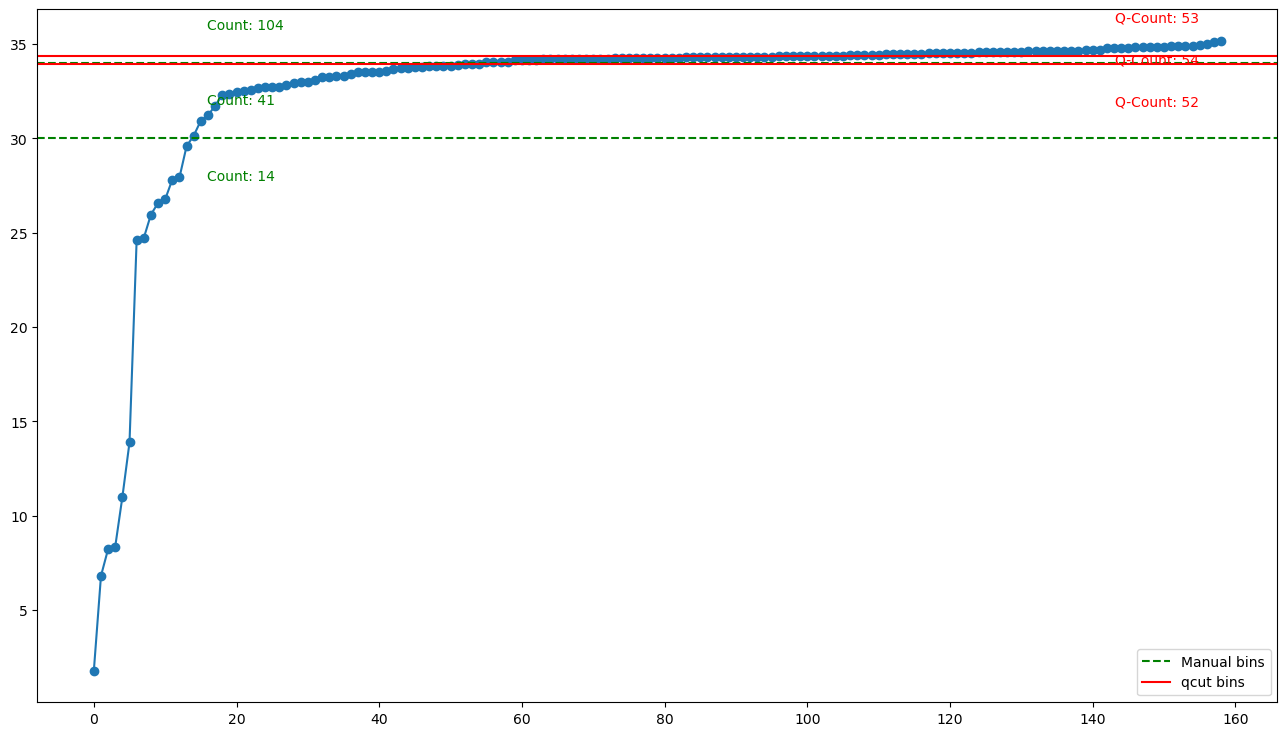

In [11]:
var = 'Salinity [PSU]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_sal = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_sal, '-o')

a = 30 # First bin
b = 34 # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')
    
bin1_count = np.sum(sorted_sal < a)
bin2_count = np.sum((sorted_sal >= a) & (sorted_sal < b))
bin3_count = np.sum(sorted_sal >= b)

# Text for manual bins
plt.text(len(sorted_sal) * 0.1, a-2, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_sal) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_sal) * 0.1, b+2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_sal, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')
# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_sal < bin_edges[1])
qbin2_count = np.sum((sorted_sal >= bin_edges[1]) & (sorted_sal < bin_edges[2]))
qbin3_count = np.sum(sorted_sal >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_sal) * 0.9, bin_edges[1]-2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_sal) * 0.9, (bin_edges[1]+bin_edges[2])/2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_sal) * 0.9, bin_edges[2]+2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.show()

## Salinity [PSU] 2 bins

NaN values for Salinity [PSU] 0


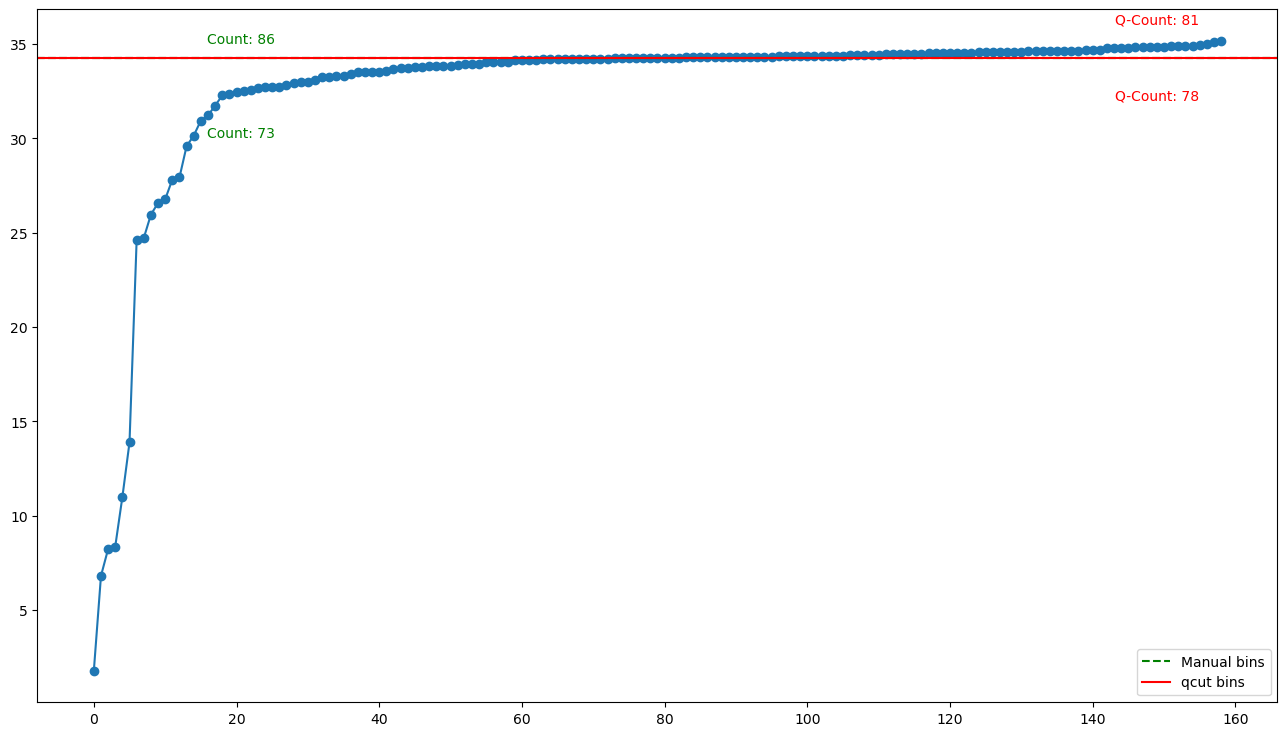

In [12]:
var = 'Salinity [PSU]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_sal = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_sal, '-o')

a = 34.25 # First bin
b = a

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_sal < a)
#bin2_count = np.sum((sorted_sal >= a) & (sorted_sal < b))
bin3_count = np.sum(sorted_sal >= b)

# Text for manual bins
plt.text(len(sorted_sal) * 0.1, a-4, f'Count: {bin1_count}', verticalalignment='center', color='g')
#plt.text(len(sorted_sal) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_sal) * 0.1, b+1, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_sal, q=2, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')
# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_sal < bin_edges[1])
#qbin2_count = np.sum((sorted_sal >= bin_edges[1]) & (sorted_sal < bin_edges[2]))
qbin3_count = np.sum(sorted_sal >= bin_edges[1])

# Text for qcut bins
plt.text(len(sorted_sal) * 0.9, bin_edges[1]-2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
#plt.text(len(sorted_sal) * 0.9, (bin_edges[1]+bin_edges[2])/2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_sal) * 0.9, bin_edges[1]+2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_salinity.pdf', bbox_inches='tight')
plt.show()

## Oxygen [ml/l]

NaN values for Oxygen [ml/l] 0


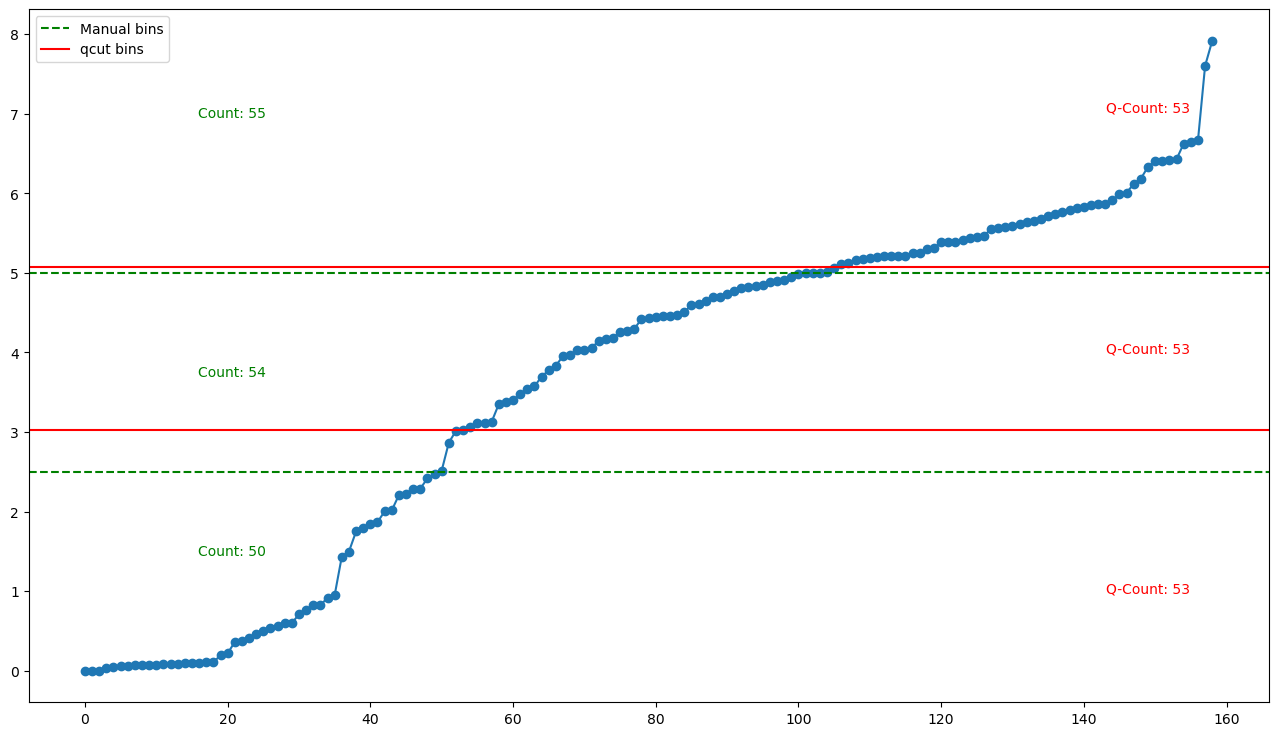

In [13]:
var = 'Oxygen [ml/l]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_oxy = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_oxy, '-o')

a = 2.5  # First bin
b = 5  # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_oxy < a)
bin2_count = np.sum((sorted_oxy >= a) & (sorted_oxy < b))
bin3_count = np.sum(sorted_oxy >= b)

# Text for manual bins
plt.text(len(sorted_oxy) * 0.1, a - 1, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_oxy) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_oxy) * 0.1, b + 2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_oxy, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_oxy < bin_edges[1])
qbin2_count = np.sum((sorted_oxy >= bin_edges[1]) & (sorted_oxy < bin_edges[2]))
qbin3_count = np.sum(sorted_oxy >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_oxy) * 0.9, bin_edges[1] - 2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_oxy) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_oxy) * 0.9, bin_edges[2] + 2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_oxygen.pdf', bbox_inches='tight')
plt.show()

## Oxygen [%]

NaN values for Oxygen [%] 0


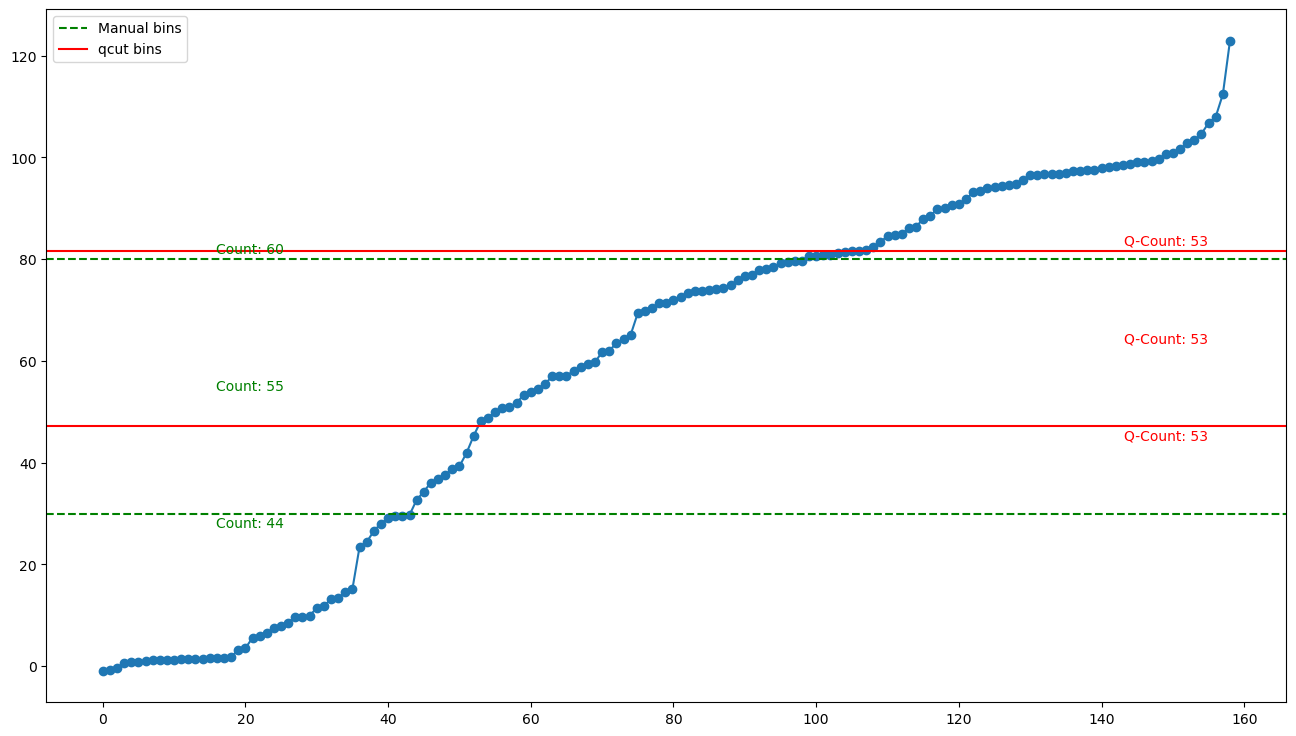

In [14]:
var = 'Oxygen [%]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_oxy_percentage = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_oxy_percentage, '-o')

a = 30  # First bin
b = 80  # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_oxy_percentage < a)
bin2_count = np.sum((sorted_oxy_percentage >= a) & (sorted_oxy_percentage < b))
bin3_count = np.sum(sorted_oxy_percentage >= b)

# Text for manual bins
plt.text(len(sorted_oxy_percentage) * 0.1, a - 2, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_oxy_percentage) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_oxy_percentage) * 0.1, b + 2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_oxy_percentage, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_oxy_percentage < bin_edges[1])
qbin2_count = np.sum((sorted_oxy_percentage >= bin_edges[1]) & (sorted_oxy_percentage < bin_edges[2]))
qbin3_count = np.sum(sorted_oxy_percentage >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_oxy_percentage) * 0.9, bin_edges[1] - 2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_oxy_percentage) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_oxy_percentage) * 0.9, bin_edges[2] + 2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_oxygen-perc.pdf', bbox_inches='tight')
plt.show()

## Fluorescence [mg/m3] 3 bins

NaN values for Fluorescence [mg/m3] 0


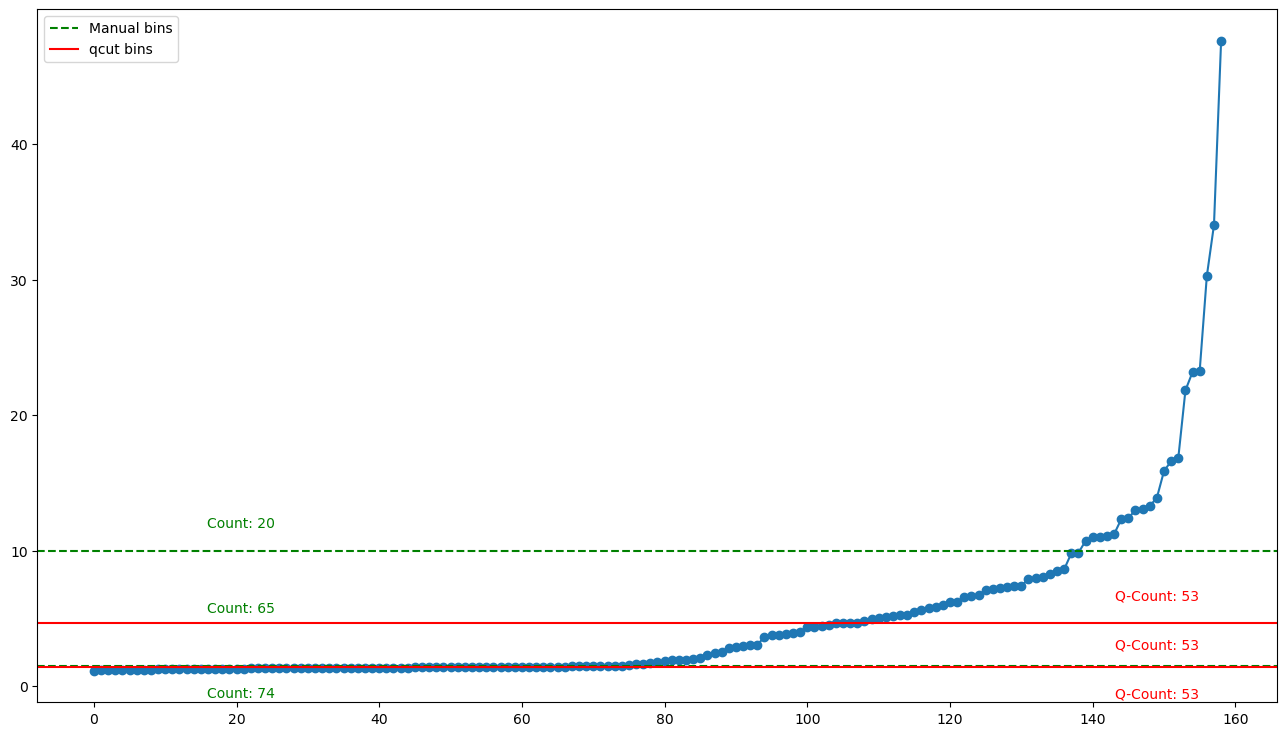

In [15]:
var = 'Fluorescence [mg/m3]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_fluorescence = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_fluorescence, '-o')

a = 1.5  # First bin
b = 10  # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_fluorescence < a)
bin2_count = np.sum((sorted_fluorescence >= a) & (sorted_fluorescence < b))
bin3_count = np.sum(sorted_fluorescence >= b)

# Text for manual bins
plt.text(len(sorted_fluorescence) * 0.1, a - 2, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_fluorescence) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_fluorescence) * 0.1, b + 2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_fluorescence, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_fluorescence < bin_edges[1])
qbin2_count = np.sum((sorted_fluorescence >= bin_edges[1]) & (sorted_fluorescence < bin_edges[2]))
qbin3_count = np.sum(sorted_fluorescence >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_fluorescence) * 0.9, bin_edges[1] - 2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_fluorescence) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_fluorescence) * 0.9, bin_edges[2] + 2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

#plt.savefig(f'{out}/fluorescence_binning.pdf', bbox_inches='tight')
plt.show()

## Fluorescence [mg/m3] 2 bins

NaN values for Fluorescence [mg/m3] 0


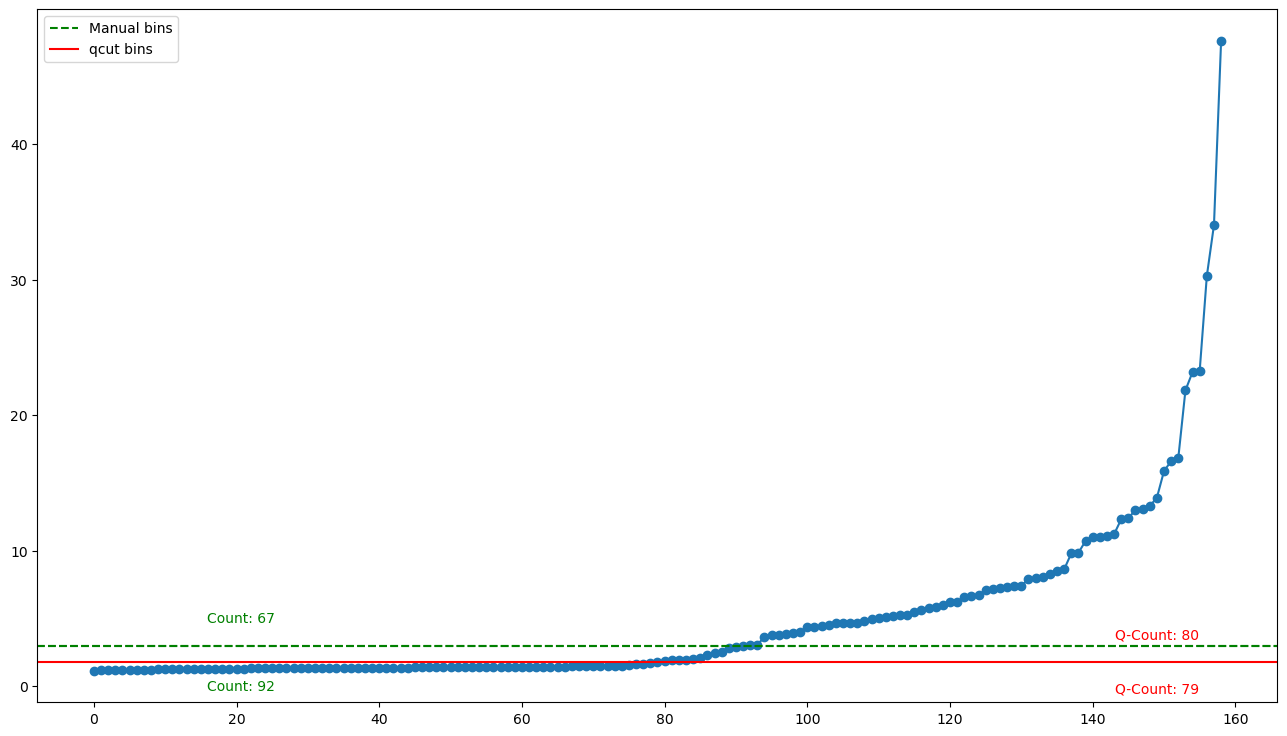

In [16]:
var = 'Fluorescence [mg/m3]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_fluorescence = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_fluorescence, '-o')

a = 3  # First bin
b = a  # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_fluorescence < a)
#bin2_count = np.sum((sorted_fluorescence >= a) & (sorted_fluorescence < b))
bin3_count = np.sum(sorted_fluorescence >= b)

# Text for manual bins
plt.text(len(sorted_fluorescence) * 0.1, a - 3, f'Count: {bin1_count}', verticalalignment='center', color='g')
#plt.text(len(sorted_fluorescence) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_fluorescence) * 0.1, b + 2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_fluorescence, q=2, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_fluorescence < bin_edges[1])
#qbin2_count = np.sum((sorted_fluorescence >= bin_edges[1]) & (sorted_fluorescence < bin_edges[2]))
qbin3_count = np.sum(sorted_fluorescence >= bin_edges[1])

# Text for qcut bins
plt.text(len(sorted_fluorescence) * 0.9, bin_edges[1] - 2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
#plt.text(len(sorted_fluorescence) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_fluorescence) * 0.9, bin_edges[1] + 2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_fluorescence.pdf', bbox_inches='tight')
plt.show()

## Orthophosphate [uM]

NaN values for Orthophosphate [uM] 0


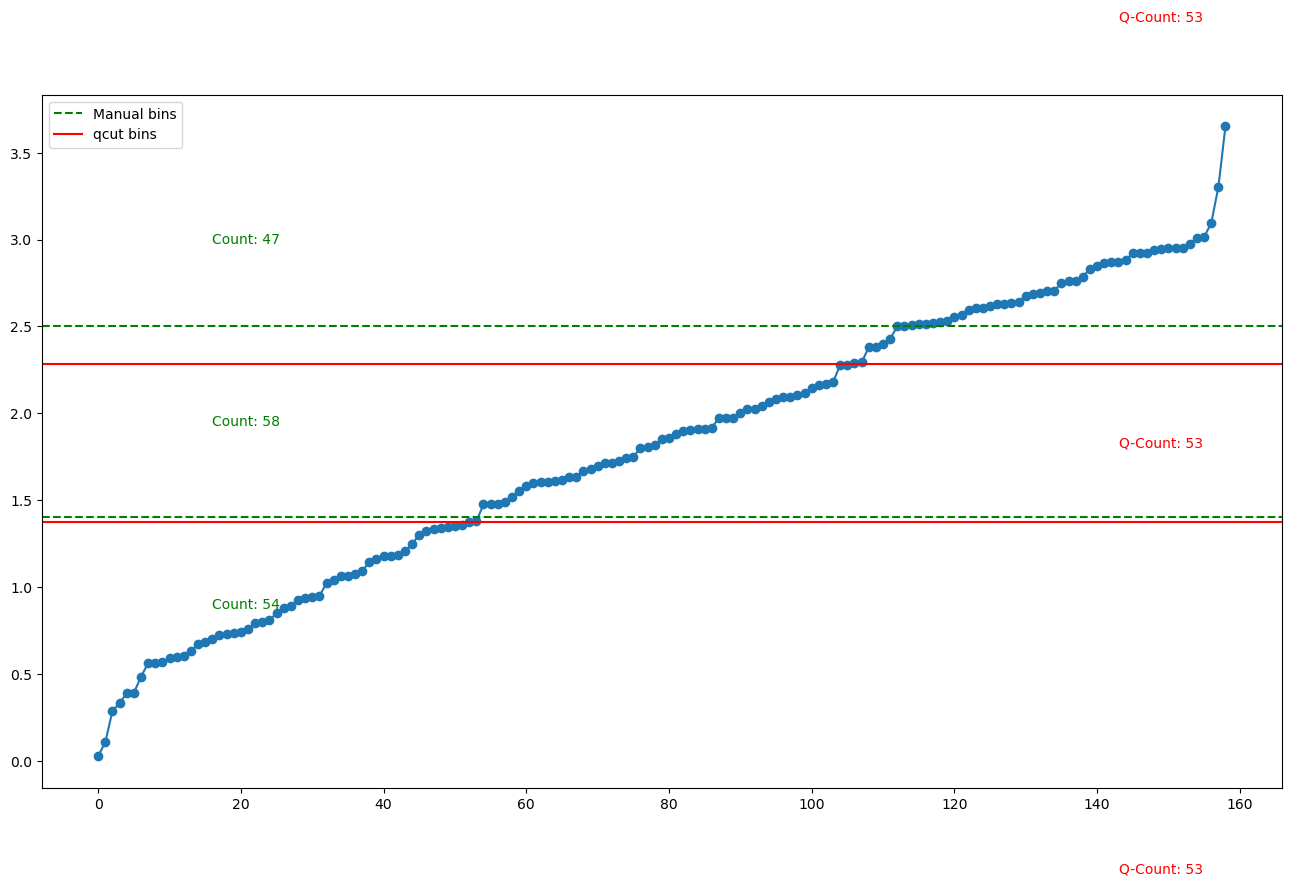

In [17]:
var = 'Orthophosphate [uM]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_phosphate = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_phosphate, '-o')

a = 1.4  # First bin
b = 2.5  # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_phosphate < a)
bin2_count = np.sum((sorted_phosphate >= a) & (sorted_phosphate < b))
bin3_count = np.sum(sorted_phosphate >= b)

# Text for manual bins
plt.text(len(sorted_phosphate) * 0.1, a - 0.5, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_phosphate) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_phosphate) * 0.1, b + 0.5, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_phosphate, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_phosphate < bin_edges[1])
qbin2_count = np.sum((sorted_phosphate >= bin_edges[1]) & (sorted_phosphate < bin_edges[2]))
qbin3_count = np.sum(sorted_phosphate >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_phosphate) * 0.9, bin_edges[1] - 2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_phosphate) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_phosphate) * 0.9, bin_edges[2] + 2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_phosphate.pdf', bbox_inches='tight')
plt.show()

## Silicic acid [uM]

NaN values for Silicic-acid [uM] 0


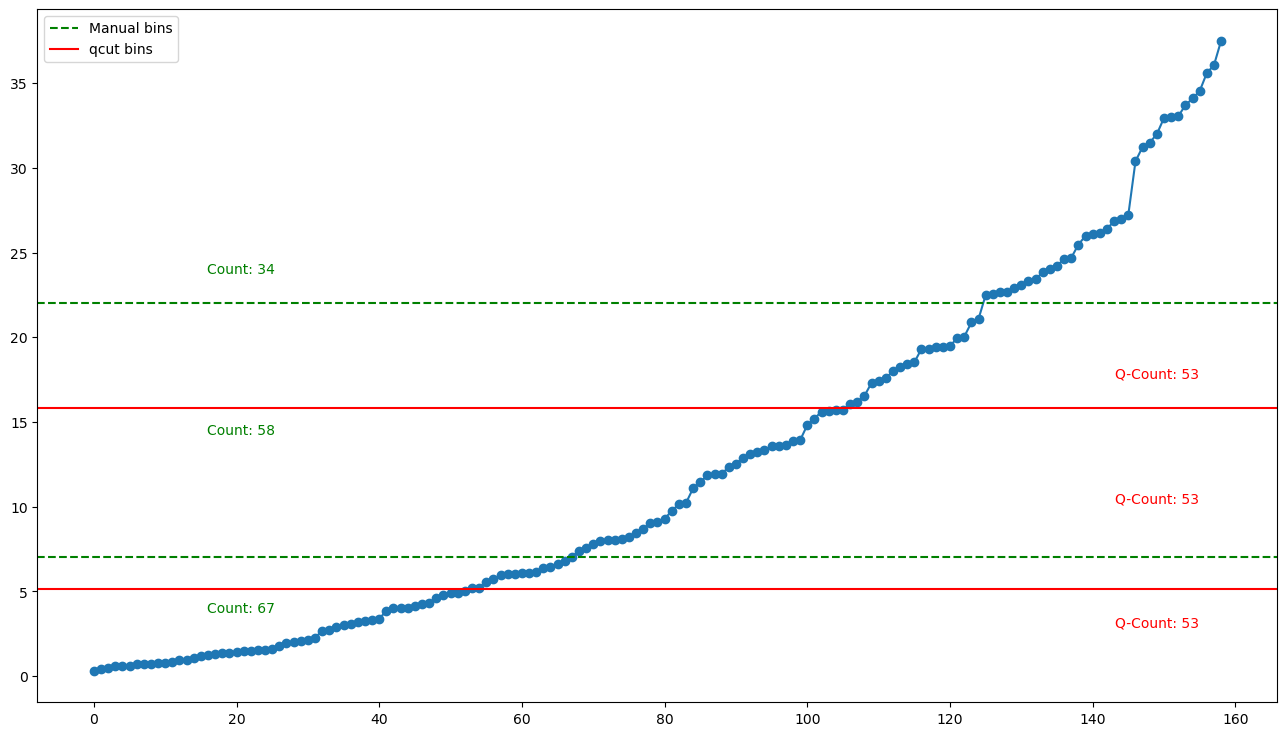

In [19]:
var = 'Silicic-acid [uM]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_si = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_si, '-o')

a = 7  # First bin
b = 22  # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_si < a)
bin2_count = np.sum((sorted_si >= a) & (sorted_si < b))
bin3_count = np.sum(sorted_si >= b)

# Text for manual bins
plt.text(len(sorted_si) * 0.1, a - 3, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_si) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_si) * 0.1, b + 2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_si, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_si < bin_edges[1])
qbin2_count = np.sum((sorted_si >= bin_edges[1]) & (sorted_si < bin_edges[2]))
qbin3_count = np.sum(sorted_si >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_si) * 0.9, bin_edges[1] - 2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_si) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_si) * 0.9, bin_edges[2] + 2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_si.pdf', bbox_inches='tight')
plt.show()

## Nitrite [uM] 3 bin

NO2

NaN values for Nitrite [uM] 0


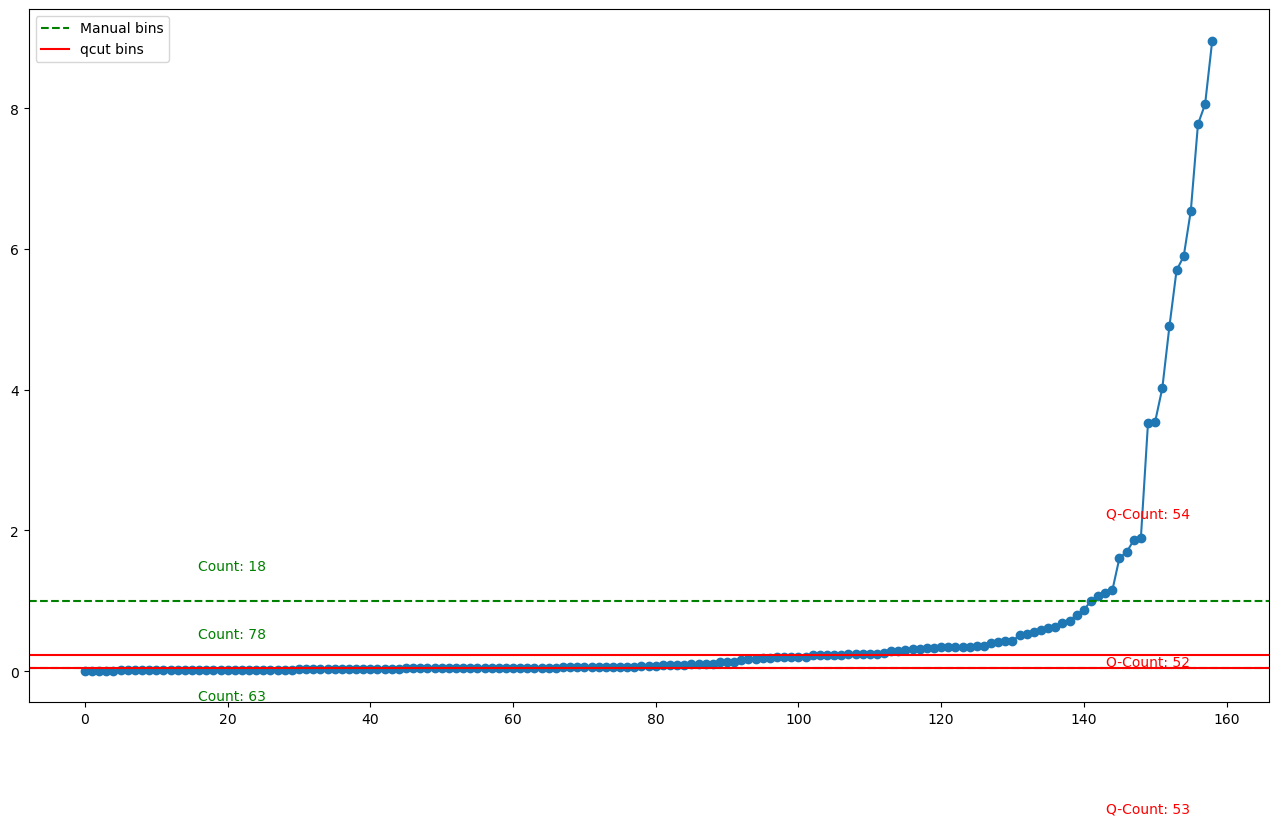

In [20]:
var = 'Nitrite [uM]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_no2 = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_no2, '-o')

a = 0.05  # First bin
b = 1  # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_no2 < a)
bin2_count = np.sum((sorted_no2 >= a) & (sorted_no2 < b))
bin3_count = np.sum(sorted_no2 >= b)

# Text for manual bins
plt.text(len(sorted_no2) * 0.1, a - 0.4, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_no2) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_no2) * 0.1, b + 0.5, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_no2, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_no2 < bin_edges[1])
qbin2_count = np.sum((sorted_no2 >= bin_edges[1]) & (sorted_no2 < bin_edges[2]))
qbin3_count = np.sum(sorted_no2 >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_no2) * 0.9, bin_edges[1] - 2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_no2) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_no2) * 0.9, bin_edges[2] + 2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()
plt.show()

## Nitrite [uM] 2 bins

NO2

NaN values for Nitrite [uM] 0


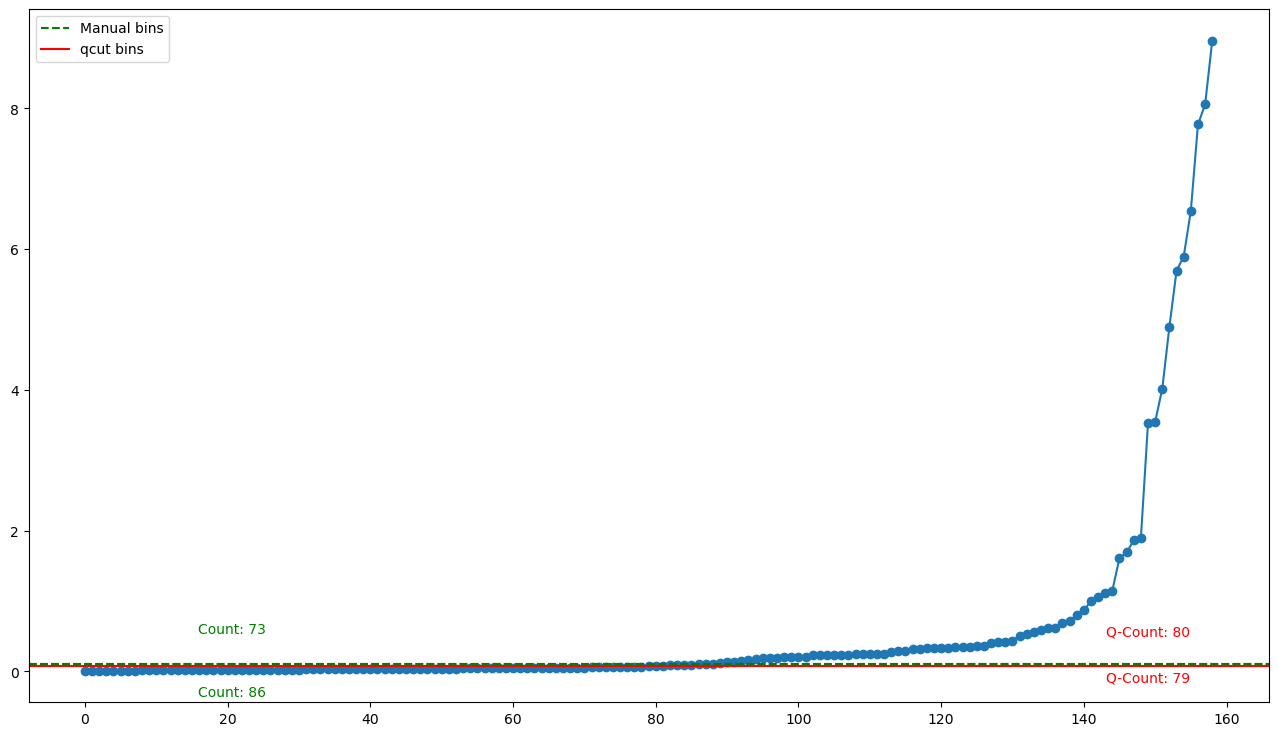

In [21]:
var = 'Nitrite [uM]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_no2 = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_no2, '-o')

a = 0.1  # First bin
b=a

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_no2 < a)
#bin2_count = np.sum((sorted_no2 >= a) & (sorted_no2 < b))
bin3_count = np.sum(sorted_no2 >= b)

# Text for manual bins
plt.text(len(sorted_no2) * 0.1, a - 0.4, f'Count: {bin1_count}', verticalalignment='center', color='g')
#plt.text(len(sorted_no2) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_no2) * 0.1, b + 0.5, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_no2, q=2, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_no2 < bin_edges[1])
#qbin2_count = np.sum((sorted_no2 >= bin_edges[1]) & (sorted_no2 < bin_edges[2]))
qbin3_count = np.sum(sorted_no2 >= bin_edges[1])

# Text for qcut bins
plt.text(len(sorted_no2) * 0.9, bin_edges[0] - 0.1, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
#plt.text(len(sorted_no2) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_no2) * 0.9, bin_edges[1] + 0.5, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_no2.pdf', bbox_inches='tight')
plt.show()

## Nitrates [uM]

NO2 + NO3

NaN values for Nitrates [uM] 0


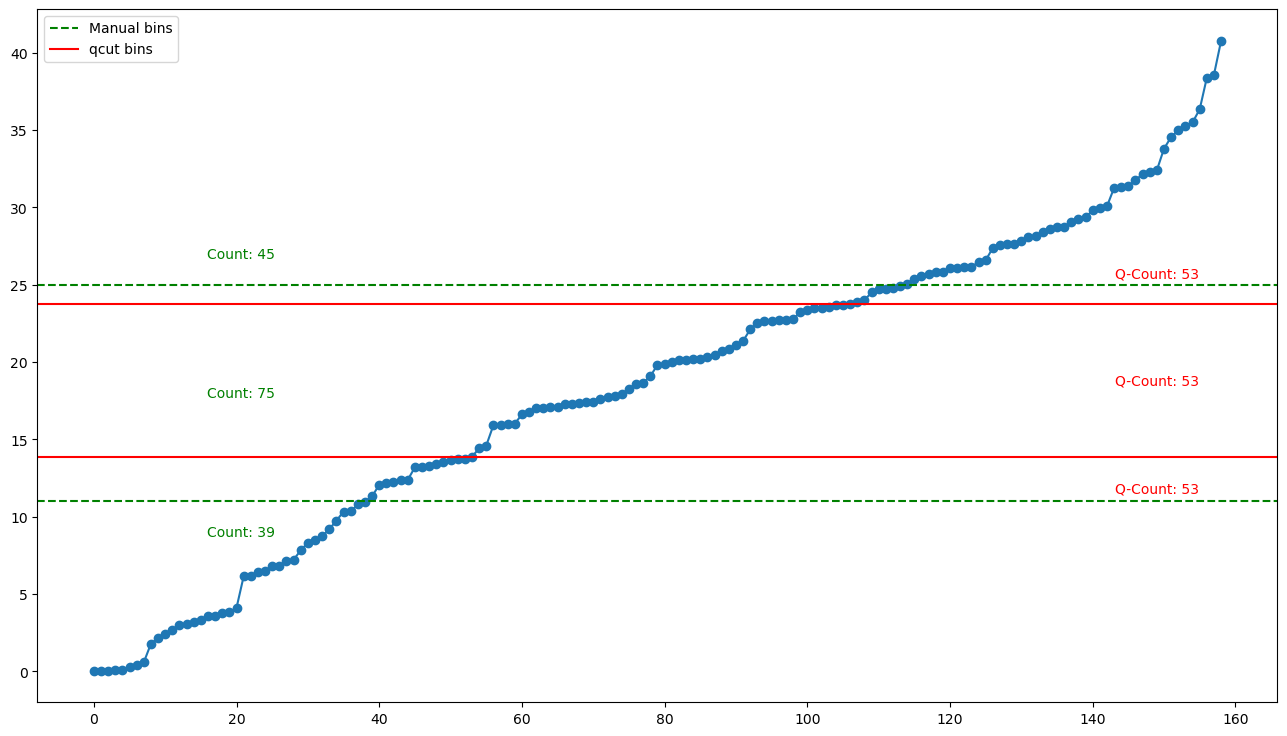

In [22]:
var = 'Nitrates [uM]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_no2_no3 = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_no2_no3, '-o')

a = 11 # First bin
b = 25  # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_no2_no3 < a)
bin2_count = np.sum((sorted_no2_no3 >= a) & (sorted_no2_no3 < b))
bin3_count = np.sum(sorted_no2_no3 >= b)

# Text for manual bins
plt.text(len(sorted_no2_no3) * 0.1, a - 2, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_no2_no3) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_no2_no3) * 0.1, b + 2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_no2_no3, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_no2_no3 < bin_edges[1])
qbin2_count = np.sum((sorted_no2_no3 >= bin_edges[1]) & (sorted_no2_no3 < bin_edges[2]))
qbin3_count = np.sum(sorted_no2_no3 >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_no2_no3) * 0.9, bin_edges[1] - 2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_no2_no3) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_no2_no3) * 0.9, bin_edges[2] + 2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_no2-no3.pdf', bbox_inches='tight')
plt.show()

## Nitrate [uM]

NO3

NaN values for Nitrate [uM] 0


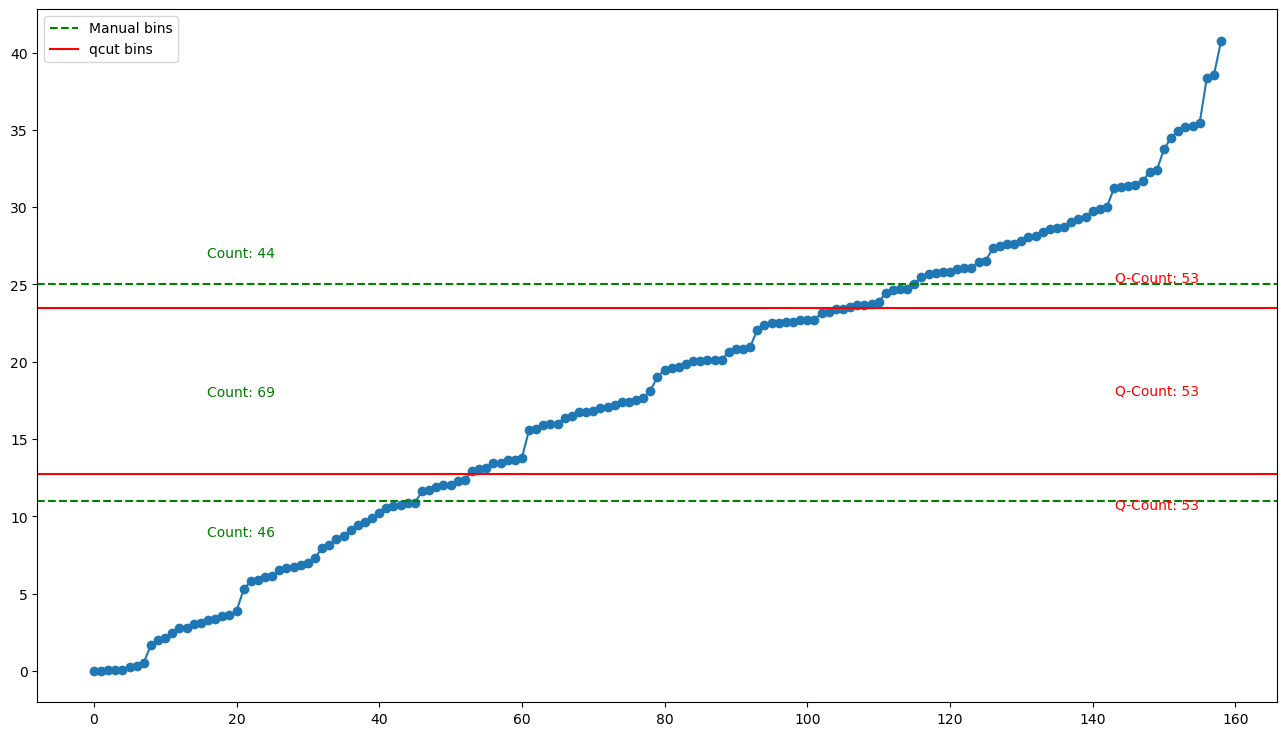

In [23]:
var = 'Nitrate [uM]'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_no3 = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_no3, '-o')

a = 11  # First bin
b = 25  # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_no3 < a)
bin2_count = np.sum((sorted_no3 >= a) & (sorted_no3 < b))
bin3_count = np.sum(sorted_no3 >= b)

# Text for manual bins
plt.text(len(sorted_no3) * 0.1, a - 2, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_no3) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_no3) * 0.1, b + 2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_no3, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_no3 < bin_edges[1])
qbin2_count = np.sum((sorted_no3 >= bin_edges[1]) & (sorted_no3 < bin_edges[2]))
qbin3_count = np.sum(sorted_no3 >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_no3) * 0.9, bin_edges[1] - 2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_no3) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_no3) * 0.9, bin_edges[2] + 2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_no3.pdf', bbox_inches='tight')
plt.show()

## N/P ratio

NaN values for NP ratio 0


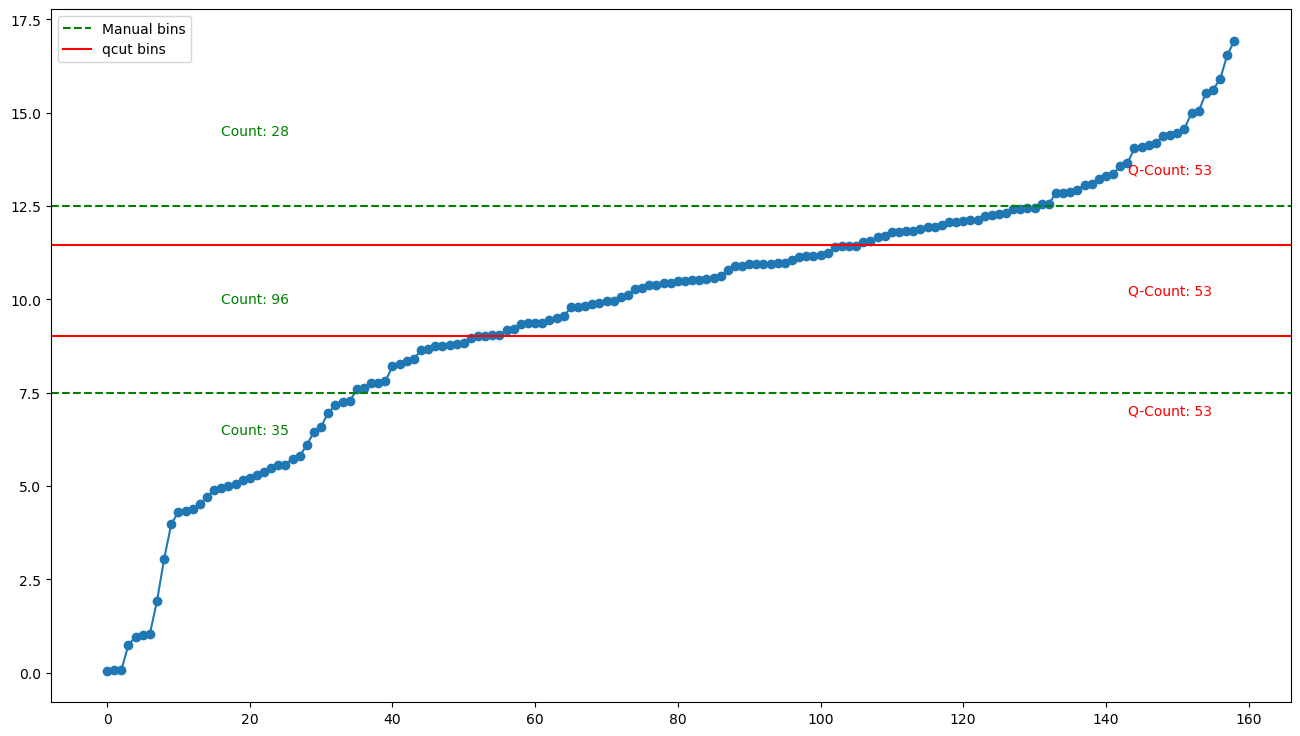

In [24]:
var = 'NP ratio'
print(f'NaN values for {var}', md[var].isna().sum())
sorted_np = np.sort(md[var])

fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(sorted_np, '-o')

a = 7.5  # First bin
b = 12.5  # Second bin

# Manual bins
plt.axhline(y=a, color='g', linestyle='--', label='Manual bins')
plt.axhline(y=b, color='g', linestyle='--')

bin1_count = np.sum(sorted_np < a)
bin2_count = np.sum((sorted_np >= a) & (sorted_np < b))
bin3_count = np.sum(sorted_np >= b)

# Text for manual bins
plt.text(len(sorted_np) * 0.1, a - 1, f'Count: {bin1_count}', verticalalignment='center', color='g')
plt.text(len(sorted_np) * 0.1, (b + a) / 2, f'Count: {bin2_count}', verticalalignment='center', color='g')
plt.text(len(sorted_np) * 0.1, b + 2, f'Count: {bin3_count}', verticalalignment='center', color='g')

# Qcut bins
quantile_bins, bin_edges = pd.qcut(sorted_np, q=3, retbins=True, duplicates='drop')
for i, edge in enumerate(bin_edges[1:-1]):  # Skip the first and last edge
    if i == 0:
        plt.axhline(y=edge, color='r', linestyle='-', label='qcut bins')
    else:
        plt.axhline(y=edge, color='r', linestyle='-')

# Number of samples in each qcut bin
qbin1_count = np.sum(sorted_np < bin_edges[1])
qbin2_count = np.sum((sorted_np >= bin_edges[1]) & (sorted_np < bin_edges[2]))
qbin3_count = np.sum(sorted_np >= bin_edges[2])

# Text for qcut bins
plt.text(len(sorted_np) * 0.9, bin_edges[1] - 2, f'Q-Count: {qbin1_count}', verticalalignment='center', color='r')
plt.text(len(sorted_np) * 0.9, (bin_edges[1] + bin_edges[2]) / 2, f'Q-Count: {qbin2_count}', verticalalignment='center', color='r')
plt.text(len(sorted_np) * 0.9, bin_edges[2] + 2, f'Q-Count: {qbin3_count}', verticalalignment='center', color='r')

plt.legend()

plt.savefig(f'{out}/binning_np.pdf', bbox_inches='tight')
plt.show()

## Conclusiones

Los bins propuestos son los siguientes:


\begin{array}{|l|l|l|l|}
\hline
\textbf{}                   & \textbf{Low} & \textbf{Mid}    & \textbf{High} \\ \hline
\textbf{Temperature [ºC]}   & < 10 & [10, 15)      & \geq 15 \\ \hline
\textbf{Salinity [PSU]}     & < 34.25 &  & \geq 34.25 \\ \hline
\textbf{Oxygen [ml/l]}      & < 2.5 & [2.5, 5)     & \geq 5 \\ \hline
\textbf{Oxygen [\%]}        & < 30 & [30, 80)     & \geq 80 \\ \hline
\textbf{Fluorescence [mg/m3]} & < 3  &  & \geq 3 \\ \hline
\textbf{Orthophosphate [uM]} & < 1.4 & [1.4, 2.5)   & \geq 2.5 \\ \hline
\textbf{Silicic acid [uM]}  & < 7  & [7, 22)      & \geq 22 \\ \hline
\textbf{Nitrite [uM]}       & < 0.1 &  & \geq 0.1 \\ \hline
\textbf{Nitrates [uM]}      & < 11 & [11, 25)     & \geq 25 \\ \hline
\textbf{Nitrate [uM]}       & < 11 & [11, 25)     & \geq 25 \\ \hline
\textbf{N/P ratio}          & < 7.5 & [7.5, 12.5)  & \geq 12.5 \\ \hline
\end{array}

